In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 1. Load Dataset
df = pd.read_csv('world_population.csv')

# --- Pilih negara studi kasus ---
country = "Indonesia"   # bisa kamu ganti
data = df[df["Country/Territory"] == country].iloc[0]

print("=== DATA NEGARA ===")
print(data)

=== DATA NEGARA ===
Rank                                   4
CCA3                                 IDN
Country/Territory              Indonesia
Capital                          Jakarta
Continent                           Asia
2022 Population                275501339
2020 Population                271857970
2015 Population                259091970
2010 Population                244016173
2000 Population                214072421
1990 Population                182159874
1980 Population                148177096
1970 Population                115228394
Area (km²)                       1904569
Density (per km²)               144.6529
Growth Rate                       1.0064
World Population Percentage         3.45
Name: 93, dtype: object


In [13]:
# 2. Ambil nilai populasi historis
years = np.array([1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022])
pop = np.array([
    data["1970 Population"],
    data["1980 Population"],
    data["1990 Population"],
    data["2000 Population"],
    data["2010 Population"],
    data["2015 Population"],
    data["2020 Population"],
    data["2022 Population"]
])

In [14]:
# 3. Estimasi parameter pertumbuhan eksponensial
# P(t) = P0 * e^(r*t)
t = years - years[0]
P0 = pop[0]
r = np.polyfit(t, np.log(pop), 1)[0]   # estimasi r

print("\nEstimasi growth rate (r):", r)


Estimasi growth rate (r): 0.016270379349903136


In [15]:
# 4. Simulasi 50 tahun ke depan (eksponensial)
future_years = np.arange(2022, 2072)
t_future = future_years - years[0]
pop_future_exp = P0 * np.exp(r * t_future)

In [16]:
# 5. Logistic Model (lebih cocok untuk populasi)
# dP/dt = rP(1 - P/K)
K = max(pop) * 3   # asumsi kapasitas lingkungan
pop_log = []
P = pop[-1]

for _ in future_years:
    dP = r * P * (1 - P/K)     # logistic differential equation
    P += dP
    pop_log.append(P)

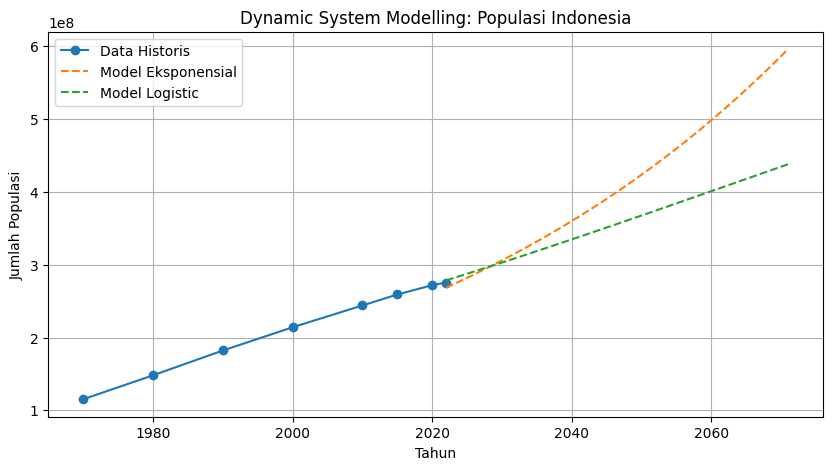

In [17]:
# 6. Visualisasi
plt.figure(figsize=(10,5))
plt.plot(years, pop, "o-", label="Data Historis")
plt.plot(future_years, pop_future_exp, "--", label="Model Eksponensial")
plt.plot(future_years, pop_log, "--", label="Model Logistic")
plt.title(f"Dynamic System Modelling: Populasi {country}")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Populasi")
plt.legend()
plt.grid(True)
plt.show()